In [1]:
import pickle 
import yaml
import pandas as pd
from PrepareData import prepare_data


import torch
from torch import nn, optim, Tensor
from torch.nn import functional as F
import pickle 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import seaborn as sns
from architecture import CLIP
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.float32


In [2]:
from train_utils import load_model

In [3]:
import yaml
config = yaml.safe_load(open('./checkpoints/RUN_unit_norm_fixed_decoder/config.yaml'))

In [4]:
model = CLIP(config)
model.to(device)
model = torch.nn.parallel.DataParallel(model)

In [5]:
from train_utils import Sampler

In [6]:
vocab = pickle.load(open(config['data']['vocab_path'], 'rb'))
sampler = Sampler(model.module.smiles_decoder,vocab)

In [7]:
torch.rand(1).dtype

torch.float32

In [8]:
from train_utils import decoder_performance
from PrepareData import prepare_data
dataloaders, max_charge, num_species = prepare_data(config)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [9]:

sampler.sample_multi(10,torch.rand(512))

100%|██████████| 10/10 [00:00<00:00, 10.70it/s]


[']H3H',
 'N-(',
 '#=<mask>4',
 ']31(+++4+-FO4()=c',
 'C)+FHHo4)N#Hn3O[=#FcO1N+H-(o2F++',
 '[FN',
 '2==<mask>4(=1NN<mask>o((-FFFF]<mask>H()NcH2=4n',
 'oF-o=)No]1#(++4))223+N)H=<mask>[o4FO4+-##',
 'F+(+]O+NO=(4+-1())H)H]o-o)3H)oF+<mask>Fnn',
 '']

In [10]:
for i, data in enumerate(dataloaders["val"]):
    spec_batch = data['IR'].to(device,dtype)
    one_hot = data['smiles'].to(device)
    spec_latent = model.module.forward_spec(data)
    break

In [11]:
spec_latent.shape

torch.Size([200, 512])

In [12]:
sampler.sample_multi(10,spec_latent[0])

100%|██████████| 10/10 [00:00<00:00, 24.47it/s]


['C4==2o[CO]4=3',
 '#O]N)+(+FO<mask>=-',
 '4O[]3oNcc=]4oNNo-N+FF)F(CF=',
 'F+FN<mask>oN=)N=NN-N4)',
 'Fc[N',
 '2H+13]C[41H(cnN)4)2+NcH2c',
 '2O)NO3)2cH+)))-nH[<mask>cHoH)(',
 '<mask>Occ)N<mask>C-H)=HHo-2c(4)=(H=#(1)2=2+FO+',
 '1+O])O)-++)]+)4O4)NN4',
 '-][](]43=(']

100%|██████████| 10/10 [00:00<00:00, 17.41it/s]


Percentage invalid 0.9


100%|██████████| 10/10 [00:00<00:00, 25.30it/s]


Percentage invalid 1.0


100%|██████████| 10/10 [00:00<00:00, 19.32it/s]


Percentage invalid 1.0


100%|██████████| 10/10 [00:00<00:00, 30.98it/s]


Percentage invalid 0.9


100%|██████████| 100/100 [00:04<00:00, 24.81it/s]


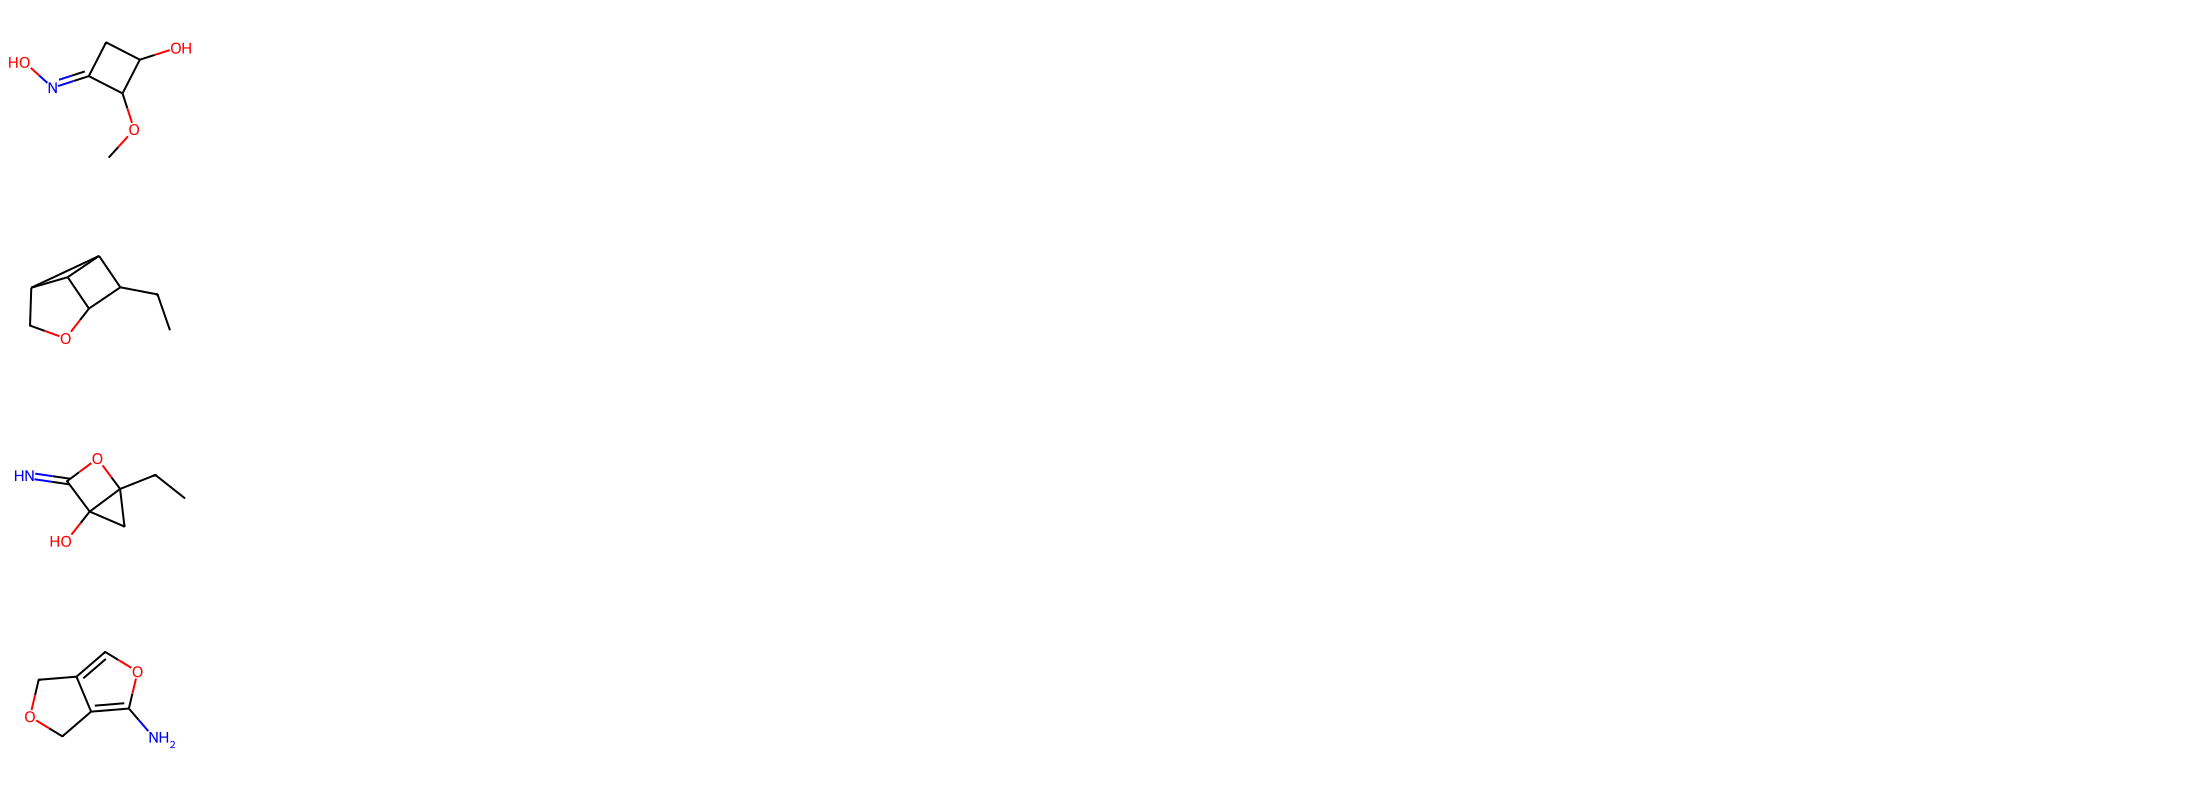

In [13]:
decoder_performance(config, model ,dataloaders,0)

In [4]:
!nvidia-smi

Thu Aug 10 05:20:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:31:00.0 Off |                  N/A |
| 70%   65C    P2   303W / 350W |  12198MiB / 24576MiB |     86%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:B1:00.0 Off |                  N/A |
| 72%   